## 91APP料視覺化實作


* 1.依日期分群：
     觀察折價卷與訂單量之關係
     
* 2.依月份分群：


In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import numpy as np


In [2]:
import plotly
import seaborn as sns
import plotly.plotly as py

In [3]:
from datetime import datetime

In [4]:
#load 91APP DartaSets
df = pd.read_csv(r'C:\Users\chenhur\Documents\GitHub\Showa_CsxPython\Ntu_DataSet\Ntu_Orders.csv')

In [5]:
#add new column dateID
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [6]:
df['new_time'] = pd.to_datetime(df['SalesOrderSlaveDateTime'], format="%Y%m%d %H:%M:%S")

In [7]:

df['Date'] = df['new_time'].apply(lambda x: x.strftime('%Y-%m-%d')) 
#df['Month'] = df['OrderTime'].apply(lambda x: x.strftime('%m'))
df['Month'] = df['new_DateId'].dt.strftime('%m')
df['Weekday'] = df['new_time'].dt.weekday_name
#df['Hour'] = df['new_time'].apply(lambda x: x.strftime('%H')) 
df['Hour'] = df['new_DateId'].dt.strftime('%H')


 # 藍色線是月銷量 綠色線是是否有使用折價劵
 * 想要藉此觀察銷量和折價劵關係


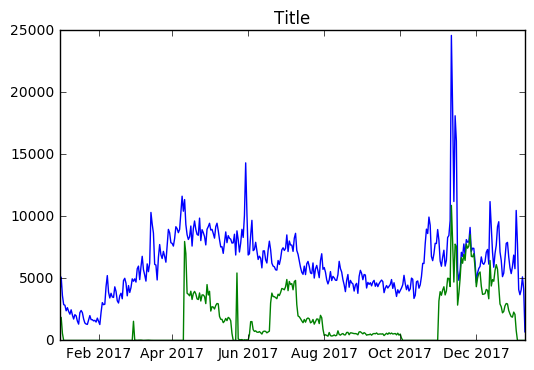

In [29]:
data_Quan = df.groupby(by='new_DateId')['Quantity'].sum()
data_Gift = df.groupby(by='new_DateId')['IsGift'].sum()
plt.title("Title")
plt.plot(data_Quan)
data_Gift = data_Gift*5
plt.plot(data_Gift)
plt.show()a

# 依月分分群

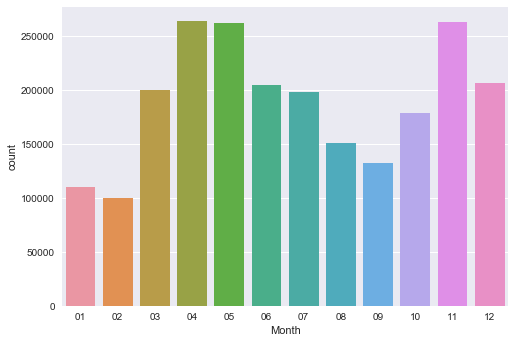

In [16]:

#data = df.groupby(by='Month')['Quantity'].sum().to_frame()
#data = data['Quantity']
#data['month'] =[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]

sns.countplot(x = 'Month', data=df)


#plt.hist(data, filename='normalized histogram')
plt.show()

* 觀察：似乎是因為4,5 月有較多促銷折價的關係，所以訂單特別多

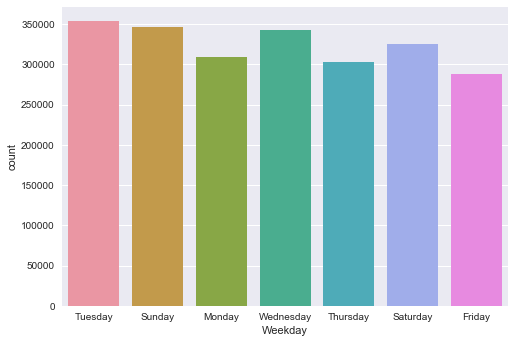

In [20]:

sns.countplot(x = 'Weekday', data=df)

* 觀察：周二、三的銷量超乎常理的比周末兩天的銷量還高，可能該電商在這兩天進行某些促銷的緣故

In [38]:
df.groupby(['LevelThreeCategoryName']).count()

,﻿SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,month
LevelThreeCategoryName,,,,,,,,,,,,,,,,,,,,,
上衣,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,1403194,...,1403194,1403194,1403194,1403194,1403194,1403194,285550,1403194,1403194,1403194
下著,505104,505104,505104,505104,505104,505104,505104,505104,505104,505104,...,505104,505104,505104,505104,505104,505104,103250,505104,505104,505104
內衣褲、小衣物收納,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,4,43,43,43
內褲,13505,13505,13505,13505,13505,13505,13505,13505,13505,13505,...,13505,13505,13505,13505,13505,13505,2246,13505,13505,13505
其他,3749,3749,3749,3749,3749,3749,3749,3749,3749,3749,...,3749,3749,3749,3749,3749,3749,1046,3749,3749,3749
其他女鞋,5621,5621,5621,5621,5621,5621,5621,5621,5621,5621,...,5621,5621,5621,5621,5621,5621,1201,5621,5621,5621
其它品牌區,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,3,53,53,53
包包、小物收納、抽屜隔板,452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,71,452,452,452
圍巾/披肩/襪品,57944,57944,57944,57944,57944,57944,57944,57944,57944,57944,...,57944,57944,57944,57944,57944,57944,17914,57944,57944,57944


In [53]:
df.LevelThreeCategoryName.nunique()

33